In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label

In [6]:
uvvis_path = './uvvis.CSV'
uvvis = pd.read_csv(uvvis_path, sep = ';', decimal = ',')

In [16]:
def make_subplot(axes, xdataname,  ydataname, displaylabel, scilimit, ncols):
    ax = axes
    sns.lineplot(x = xdataname, y = ydataname, ax = ax, label = displaylabel)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = scilimit)
    ax.yaxis.offsetText.set_fontsize(9)
    ax.legend(frameon = False, ncol=2, fontsize = 8)

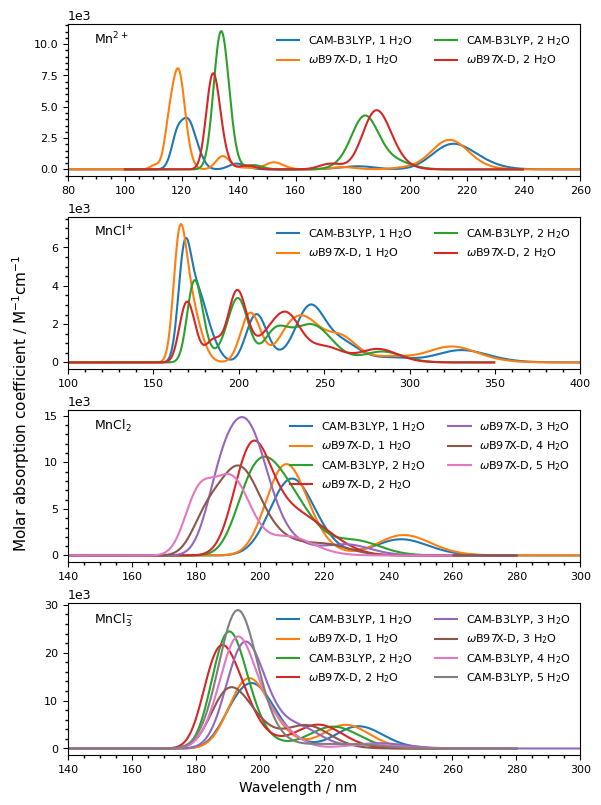

In [28]:
fig, axes = plt.subplots(4, 1, figsize = (6, 8))

make_subplot(axes[0], uvvis['X Mn cam 1'], uvvis['Y Mn cam 1'], 'CAM-B3LYP, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[0], uvvis['X Mn wb 1'], uvvis['Y Mn wb 1'], '$\omega$B97X-D, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[0], uvvis['X Mn cam 2'], uvvis['Y Mn cam 2'], 'CAM-B3LYP, 2 H$_{2}$O', (3,3), 3)
make_subplot(axes[0], uvvis['X Mn wb 2'], uvvis['Y Mn wb 2'], '$\omega$B97X-D, 2 H$_{2}$O', (3,3), 3)
axes[0].set_xlim(80, 260)

make_subplot(axes[1], uvvis['X MnCl+ cam 1'], uvvis['Y MnCl+ cam 1'], 'CAM-B3LYP, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[1], uvvis['X MnCl+ wb 1'], uvvis['Y MnCl+ wb 1'], '$\omega$B97X-D, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[1], uvvis['X MnCl+ cam 2'], uvvis['Y MnCl+ cam 2'], 'CAM-B3LYP, 2 H$_{2}$O', (3,3), 3)
make_subplot(axes[1], uvvis['X MnCl+ wb 2'], uvvis['Y MnCl+ wb 2'], '$\omega$B97X-D, 2 H$_{2}$O', (3,3), 3)
axes[1].set_xlim(100, 400)

make_subplot(axes[2], uvvis['X MnCl2 cam 1'], uvvis['Y MnCl2 cam 1'], 'CAM-B3LYP, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 1'], uvvis['Y MnCl2 wb 1'], '$\omega$B97X-D, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 cam 2'], uvvis['Y MnCl2 cam 2'], 'CAM-B3LYP, 2 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 2'], uvvis['Y MnCl2 wb 2'], '$\omega$B97X-D, 2 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 3'], uvvis['Y MnCl2 wb 3'], '$\omega$B97X-D, 3 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 4'], uvvis['Y MnCl2 wb 4'], '$\omega$B97X-D, 4 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 5'], uvvis['Y MnCl2 wb 5'], '$\omega$B97X-D, 5 H$_{2}$O', (3,3), 3)
axes[2].set_xlim(140, 300)

make_subplot(axes[3], uvvis['X MnCl3- cam 1'], uvvis['Y MnCl3- cam 1'], 'CAM-B3LYP, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- wb 1'], uvvis['Y MnCl3- wb 1'], '$\omega$B97X-D, 1 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 2'], uvvis['Y MnCl3- cam 2'], 'CAM-B3LYP, 2 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- wb 2'], uvvis['Y MnCl3- wb 2'], '$\omega$B97X-D, 2 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 3'], uvvis['Y MnCl3- cam 3'], 'CAM-B3LYP, 3 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- wb 3'], uvvis['Y MnCl3- wb 3'], '$\omega$B97X-D, 3 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 4'], uvvis['Y MnCl3- cam 4'], 'CAM-B3LYP, 4 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 5'], uvvis['Y MnCl3- cam 5'], 'CAM-B3LYP, 5 H$_{2}$O', (3,3), 3)
axes[3].set_xlim(140, 300)

sublabels = ['Mn$^{2+}$', 'MnCl$^{+}$', 'MnCl$_{2}$', 'MnCl$_{3}^{-}$']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.05, 0.87, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 11)
fig.tight_layout(pad=0.5)
# plt.savefig('diff_functional_water.png', dpi=150)
plt.show()

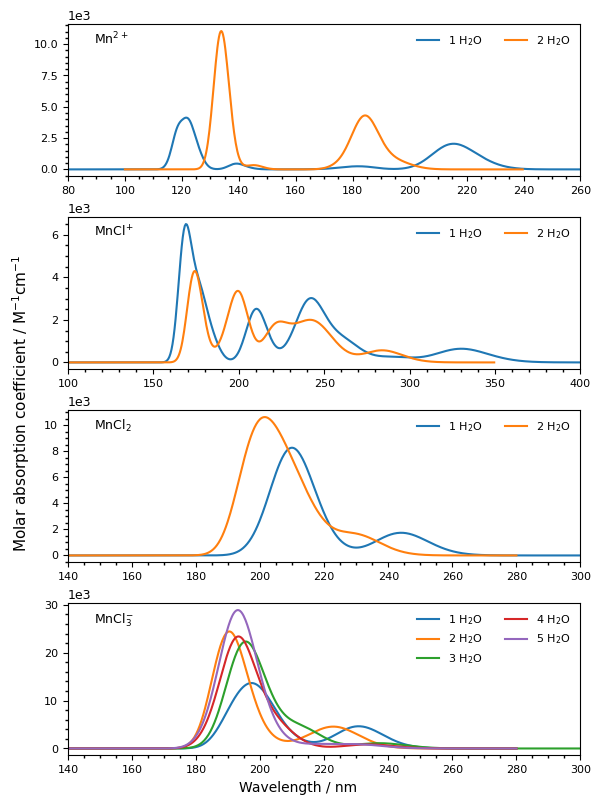

In [27]:
fig, axes = plt.subplots(4, 1, figsize = (6, 8))

make_subplot(axes[0], uvvis['X Mn cam 1'], uvvis['Y Mn cam 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[0], uvvis['X Mn cam 2'], uvvis['Y Mn cam 2'], '2 H$_{2}$O', (3,3), 3)
axes[0].set_xlim(80, 260)

make_subplot(axes[1], uvvis['X MnCl+ cam 1'], uvvis['Y MnCl+ cam 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[1], uvvis['X MnCl+ cam 2'], uvvis['Y MnCl+ cam 2'], '2 H$_{2}$O', (3,3), 3)
axes[1].set_xlim(100, 400)

make_subplot(axes[2], uvvis['X MnCl2 cam 1'], uvvis['Y MnCl2 cam 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 cam 2'], uvvis['Y MnCl2 cam 2'], '2 H$_{2}$O', (3,3), 3)
axes[2].set_xlim(140, 300)

make_subplot(axes[3], uvvis['X MnCl3- cam 1'], uvvis['Y MnCl3- cam 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 2'], uvvis['Y MnCl3- cam 2'], '2 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 3'], uvvis['Y MnCl3- cam 3'], '3 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 4'], uvvis['Y MnCl3- cam 4'], '4 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- cam 5'], uvvis['Y MnCl3- cam 5'], '5 H$_{2}$O', (3,3), 3)
axes[3].set_xlim(140, 300)

sublabels = ['Mn$^{2+}$', 'MnCl$^{+}$', 'MnCl$_{2}$', 'MnCl$_{3}^{-}$']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.05, 0.87, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 11)
fig.tight_layout(pad=0.5)
# plt.savefig('diff_functional_water.png', dpi=150)
plt.show()

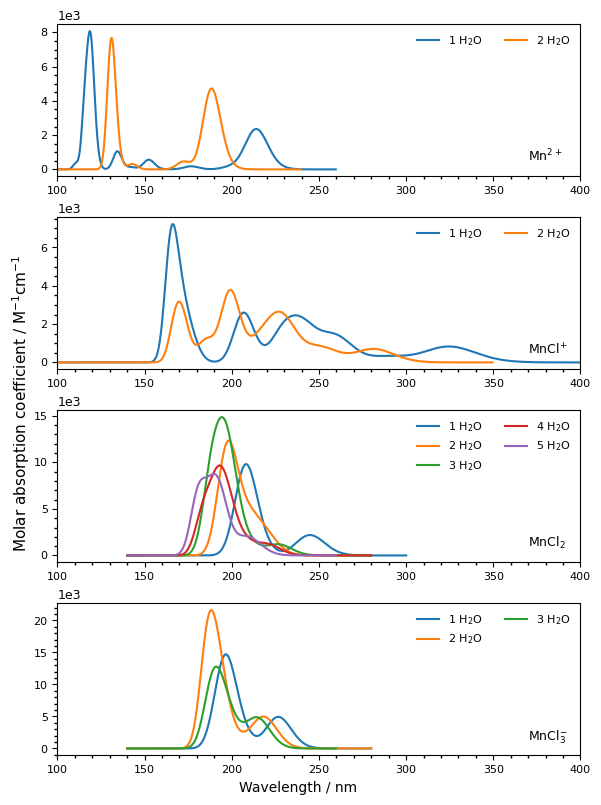

In [32]:
fig, axes = plt.subplots(4, 1, figsize = (6, 8))

make_subplot(axes[0], uvvis['X Mn wb 1'], uvvis['Y Mn wb 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[0], uvvis['X Mn wb 2'], uvvis['Y Mn wb 2'], '2 H$_{2}$O', (3,3), 3)
axes[0].set_xlim(100, 400)

make_subplot(axes[1], uvvis['X MnCl+ wb 1'], uvvis['Y MnCl+ wb 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[1], uvvis['X MnCl+ wb 2'], uvvis['Y MnCl+ wb 2'], '2 H$_{2}$O', (3,3), 3)
axes[1].set_xlim(100, 400)

make_subplot(axes[2], uvvis['X MnCl2 wb 1'], uvvis['Y MnCl2 wb 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 2'], uvvis['Y MnCl2 wb 2'], '2 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 3'], uvvis['Y MnCl2 wb 3'], '3 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 4'], uvvis['Y MnCl2 wb 4'], '4 H$_{2}$O', (3,3), 3)
make_subplot(axes[2], uvvis['X MnCl2 wb 5'], uvvis['Y MnCl2 wb 5'], '5 H$_{2}$O', (3,3), 3)
axes[2].set_xlim(100, 400)

make_subplot(axes[3], uvvis['X MnCl3- wb 1'], uvvis['Y MnCl3- wb 1'], '1 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- wb 2'], uvvis['Y MnCl3- wb 2'], '2 H$_{2}$O', (3,3), 3)
make_subplot(axes[3], uvvis['X MnCl3- wb 3'], uvvis['Y MnCl3- wb 3'], '3 H$_{2}$O', (3,3), 3)
axes[3].set_xlim(100, 400)

sublabels = ['Mn$^{2+}$', 'MnCl$^{+}$', 'MnCl$_{2}$', 'MnCl$_{3}^{-}$']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.9, 0.1, l, transform = ax.transAxes, fontsize = 9)

fig.supxlabel('Wavelength / nm', fontsize = 10)
fig.supylabel('Molar absorption coefficient / M$^{-1}$cm$^{-1}$', fontsize = 11)
fig.tight_layout(pad=0.5)
# plt.savefig('diff_functional_water.png', dpi=150)
plt.show()